In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import glob
import os


In [3]:
test_camera_dir = 'test_camera'
test_data_dir = 'test_data'

## Camera calibration

========= [[[314.10162 688.5647 ]]

 [[392.28705 690.0531 ]]

 [[470.73584 691.48804]]

 [[549.62286 692.94507]]

 [[629.0065  694.4644 ]]

 [[316.0061  763.3436 ]]

 [[392.9929  764.72186]]

 [[470.27542 766.4463 ]]

 [[547.8586  768.171  ]]

 [[625.9878  769.804  ]]

 [[317.64444 835.79846]]

 [[393.56424 837.4757 ]]

 [[469.67975 839.3029 ]]

 [[546.24445 841.1277 ]]

 [[623.18    842.9499 ]]

 [[319.3583  906.57416]]

 [[394.20203 908.32965]]

 [[469.19614 910.12695]]

 [[544.63513 912.23083]]

 [[620.474   914.3118 ]]

 [[320.7083  975.5322 ]]

 [[394.67053 977.1462 ]]

 [[468.60397 979.294  ]]

 [[543.19824 981.42065]]

 [[617.9789  983.64197]]]
========= [[[635.90283 472.18073]]

 [[635.8016  540.26263]]

 [[635.7027  610.4235 ]]

 [[635.7772  682.656  ]]

 [[635.85223 757.4136 ]]

 [[565.159   473.07922]]

 [[563.97595 540.6285 ]]

 [[562.86505 610.40314]]

 [[561.73694 682.2489 ]]

 [[560.6271  756.33936]]

 [[495.34586 473.91418]]

 [[493.252   541.142  ]]

 [[491.11517 610.3

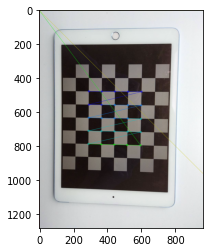

In [4]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

pattern_size = (5, 5)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob(os.path.join(test_camera_dir, '*'))

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        print("=========", corners2)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (7,6), corners2, ret)
        plt.imshow(img)
        #cv2.waitKey(2000)


In [37]:
def findChessboardCorners(img, corn_x, corn_y):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(img, (corn_x, corn_y), None)  
    print(ret, corners)

In [38]:
findChessboardCorners(cal_img, corn_x, corn_y)

False None


In [13]:
def showChessboardCorners(img, nx, ny, ret, corners):
    """
    Draws the chessboard corners of a given image
    nx and ny parameters respectively indicate the number of inner corners in the x and y directions
    ret and corners should represent the results from cv2.findChessboardCorners()
    """
    c_img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.axis('off')
    plt.imshow(img)

In [14]:
ret, corners = findChessboardCorners(to_grayscale(cal_img), cx, cy)
showChessboardCorners(cal_img, cx, cy, ret, corners)

NameError: name 'to_grayscale' is not defined

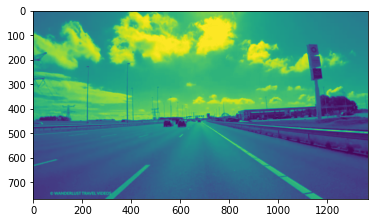

In [3]:
image = cv2.imread('test_data/test4.png')
image = canny(image)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [49]:
height_origin, width_origin, _ = image.shape
point_on_image = np.copy(image)
orig_img_coord = np.float32([[550, 500], [850, 500], [200, height_origin], [1300, height_origin]])

for x in range(4):
    image = cv2.circle(image, (int(orig_img_coord[x][0]), int(orig_img_coord[x][1])), 10, (0,0,255), -1)

plt.imshow(image)

ValueError: not enough values to unpack (expected 3, got 2)

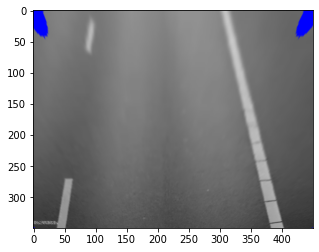

In [42]:
height, width = 350, 450
new_img_coord = np.float32([[0,0], [width, 0], [0, height], [width, height]])

matrix = cv2.getPerspectiveTransform(orig_img_coord, new_img_coord)
new_img = cv2.warpPerspective(image, matrix, (width, height))
plt.imshow(new_img)

In [ ]:
cv2.getPerspectiveTransform()